# QF5204: Assignment 3


## Quanto European Option

A [quanto option](http://en.wikipedia.org/wiki/Quanto), unlike a normal European option that pays the final payoff in the denominated currency of the underlying stock or asset,
pays the final payoff in another currency at a pre-determined exchange rate.

For example, let's say a stock $S_a$ is listed on Singapore Exchange (SGX) and denominatd in SGD. A quanto call option allows the holder to receive the payoff $\max(S_a - K, 0)$ in another currency (called the quanto currency), e.g., JPY,  at a pre-fixed exchange rate $F_0 = 100$.

The payoff of the quanto call option in the stock's denominated currency is thus $F_0\times \max(S_a(T) - K, 0) \times S_b(T)$ where $S_b$ is the value of one quanto currency in the unit of the stock's denominated currency.

Assuming the stock and the quanto-denominated currency pair both follow geometric Brownian motion:

\begin{align}
& \frac{dS_a(t)}{S_a(t)} = (r_d - r_a) dt + \sigma_a dW_a \\
& \frac{dS_b(t)}{S_b(t)} = (r_d - r_b) dt + \sigma_b dW_b \\
& dW_a dW_b = \rho dt
\end{align}

where $r_d$ is the risk free interest rate of the stock's denominated currency,
$r_a$ is the continuous yield of the stock,
and $r_b$ is the interest rate of the quanto currency,
and $\rho \in [-1, 1]$ is the correlation between the stock price and the foreign exchange rate.

Prove that the closed form solution for a quanto European call option is:

\begin{align}
S_b(0) F e^{-r_bT}\left( S_a(0) e^{(r_d - r_a + \rho \sigma_a \sigma_b)T} N(d_+) - K N(d_-)  \right).
\end{align}
where

\begin{align*}
d_{\pm} = \frac{\ln \frac{S_a(0)}{K} + (r_d - r_a + \rho \sigma_a \sigma_b \pm \frac{1}{2}\sigma_a^2)T}{\sigma_a \sqrt{T}}
\end{align*}

### Proof

Let's consider the value of the option in JPY: V. Construct a portfolio consisting of the 1 option, $\delta_s$ stock (S) and $\delta_c$ SGD currency. The portfolio in JPY is

$$
\Pi = -V + \delta_c S_b^{-1} + \delta_s SS_b^{-1}
$$

Let $F = S_b^{-1}$. Applying [Ito's Lemma](https://en.wikipedia.org/wiki/It%C3%B4%27s_lemma#Geometric_Brownian_motion),
\begin{align*}
d(F) = d(\frac{1}{S_b}) &= -\frac{dS_b}{S_b^2} + \frac{\sigma_b^2}{2}\frac{2}{S_b^3}d(S_b)^2 \\
&= -\frac{1}{S_b}(\frac{dS_b}{S_b} - \sigma_b^2dt) \\
&= F((r_b - r_d + \sigma_b^2)dt - \sigma_bdW_b) \\
\end{align*}

Discretize $\Pi$
$$
\Delta \Pi = -\Delta V + \delta_c r_d F \Delta t + \delta_s (F\Delta S + S\Delta F + \Delta S \Delta F)
$$

From Ito's lemma,
$$
\Delta V =
\left(
\frac{\partial V}{\partial t}
+ \frac{S^2\sigma_a^2}{2}\frac{\partial^2 V}{\partial S^2}
+ \frac{F^2\sigma_b^2}{2}\frac{\partial^2 V}{\partial F^2}
- \rho\sigma_a\sigma_b FS \frac{\partial^2 V}{\partial S\partial F}
\right) \Delta t
+ \frac{\partial V}{\partial S}\Delta S
+ \frac{\partial V}{\partial F}\Delta F
$$

We get rid of the uncertainty in $\Delta \Pi$ ($\Delta S$ and $\Delta F$) by setting
\begin{align*}
\delta_s &= \frac{1}{F}\frac{\partial V}{\partial S} \\
\delta_c &= \frac{\partial V}{\partial F} - \frac{S}{F}\frac{\partial V}{\partial S} \\
\end{align*}

Since, $\Pi$ is riskless $\Delta \Pi = r_b\Pi \Delta t$

$$
\frac{\partial V}{\partial t}
+ \frac{\sigma_a^2}{2}\frac{\partial^2 V}{\partial S^2}
+ \frac{\sigma_b^2}{2}\frac{\partial^2 V}{\partial F^2}
- \rho\sigma_a\sigma_b FS \frac{\partial^2 V}{\partial S\partial F}
- \delta_c r_d F + \delta_s \rho\sigma_s\sigma_bFS
= -r_b(-V + \delta_c F + \delta_s SF)
$$

Finally, consider $V = F_0 \times max(S - K, 0)$ where $F_0$ is _constant_. The above PDE reduces to

$$
\frac{\partial V}{\partial t}
+ \frac{S^2\sigma_a^2}{2}\frac{\partial^2 V}{\partial S^2}
+ S\frac{\partial V}{\partial S}(r_d + \rho\sigma_s\sigma_b)
- r_bV = 0
$$

Note that we have been working under the assumption that the stock S does not pay dividends (to save myself from a headache). Just [like in](https://quant.stackexchange.com/a/48867) the vanilla option which pays dividend, we replace $r_d$ with $r_d - r_a$. I'm sure it reduces to the same result if we had actually used $e^{r_at}S_a$ instead of just $S_a$ to account for the dividends.

$$
\frac{\partial V}{\partial t}
+ \frac{S^2\sigma_a^2}{2}\frac{\partial^2 V}{\partial S^2}
+ S\frac{\partial V}{\partial S}(r_d - r_a + \rho\sigma_s\sigma_b)
- r_bV = 0
$$


Solve the above PDE to get
\begin{align}
V = F_0 e^{-r_bT}\left( S_a(0) e^{(r_d - r_a + \rho \sigma_a \sigma_b)T} N(d_+) - K N(d_-)  \right).
\end{align}
where

\begin{align*}
d_{\pm} = \frac{\ln \frac{S_a(0)}{K} + (r_d - r_a + \rho \sigma_a \sigma_b \pm \frac{1}{2}\sigma_a^2)T}{\sigma_a \sqrt{T}}
\end{align*}

Finally, multiply by the discounted exchange rate, $E[e^{-r_bT}S_b] = S_b(0)$, to get the value of the option in SGD.

References:
* [Wikipedia - Black Scholes equation derivation](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_equation#Derivation)
* [MathFinance - Quanto Options](https://www.mathfinance2.com/MF_website/UserAnonymous/Company/papers/wystup_quanto_eqf.pdf)
* [Stackexchange - Pairwise exchange rates not the inverse of each other](https://money.stackexchange.com/questions/138082/why-are-pair-wise-exchange-rates-not-the-inverse-of-each-other)
* [Journal of Computational and Applied Math - The pricing of Quanto options under dynamic correlation](https://doi.org/10.1016/j.cam.2014.07.017)
* [Mark Joshi - The Concepts of Mathematical Finance](https://www.amazon.com/Concepts-Practice-Mathematical-Finance-Mathematics/dp/0521823552)

### Implementation

In [1]:
import math
from scipy.stats import norm


def quantoCallAnalytic(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F):
    mu = rd - ra + rho*sigmaA*sigmaB
    sd = sigmaA * (T ** 0.5)

    d1 = (math.log(sa0 / K) + mu*T)/sd + sd/2
    d2 = d1 - sd

    d1_cdf = norm.cdf(d1)
    d2_cdf = norm.cdf(d2)

    D = math.exp(-rb*T)
    return F * D * sb0 * (sa0*math.exp(mu*T)*d1_cdf - K*d2_cdf)

In [2]:
T = 1
K, F = 102, 100
sa0, sb0 = 100, 1/80
rd, ra, rb = 0.02, 0.05, 0.01
sigmaA, sigmaB, rho = 0.2, 0.15, 0.4

quantoCallAnalytic(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F)

7.7022809703402455

### Change with $\rho$

Plot the change of price with respect to the change of correlation.

Text(0, 0.5, 'price')

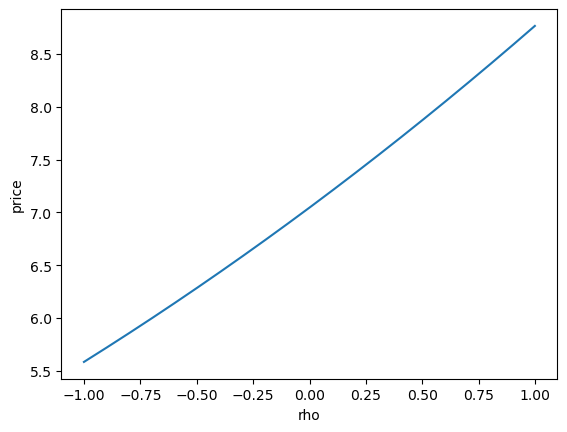

In [3]:
import matplotlib.pyplot as plt
import numpy as np


rho_range = np.arange(-1, 1, 0.001)
plt.plot(rho_range,
         [quantoCallAnalytic(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F)
          for rho in rho_range])
plt.xlabel("rho")
plt.ylabel("price")

Slight curvature, expected due to exponentials.

Derive the closed-form formula for $\frac{\partial V}{\partial \rho}$. Implement the function and include the test results.

Echoing the closed-form valuation of the quanto European option:

\begin{align*}
C &= e^{-r_bT} F S_b(0) \\
\mu &= r_d - r_a + \rho\sigma_a\sigma_b \\
d_{\pm} &= \frac{\ln \frac{S_a(0)}{K} + (\mu \pm \frac{1}{2}\sigma_a^2)T}{\sigma_a \sqrt{T}} \\
V &= C\left( S_a(0) e^{\mu T} N(d_+) - K N(d_-)  \right) \\
\end{align*}


Differentiating w.r.t $\rho$:

\begin{align}
\frac{\partial V}{\partial \rho} &= C\left( S_a(0) e^{\mu T}N(d_+)\frac{\partial \mu}{\partial \rho}T + S_a(0)e^{\mu T}\varphi(d_+)\frac{\partial d_+}{\partial \rho} - K\varphi(d_-)\frac{\partial d_-}{\partial \rho}\right)
\end{align}
where

$$
\frac{\partial \mu}{\partial \rho} = \sigma_a\sigma_b \text{; }
\frac{\partial d_\pm}{\partial \rho} = \sigma_b \sqrt{T} \text{ and }
\varphi(x) = \frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}  
$$

In [4]:
def quantoCallRhoSlope(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F):
    mu = rd - ra + rho*sigmaA*sigmaB
    mu_prime = sigmaA*sigmaB
    
    sd = sigmaA * (T ** 0.5)

    d1 = (math.log(sa0 / K) + mu*T)/sd + sd/2
    d2 = d1 - sd

    d1_cdf = norm.cdf(d1)
    d2_pdf = norm.pdf(d2)
    d1_pdf = norm.pdf(d1)
    d_prime = sigmaB * (T ** 0.5)

    D = math.exp(-rb*T)
    return D * F * sb0 * (sa0*np.exp(mu*T)*d1_cdf*mu_prime*T + sa0*np.exp(mu*T)*d1_pdf*d_prime - K*d2_pdf*d_prime)

Check for a bunch of rhos that the closed form agrees (tol = 1e-2) with the differential approximated by finite difference.

In [5]:
def is_close(a, b, tol=1e-6):
    return abs(a - b) < tol

In [6]:
drho = 0.01
for rho in np.arange(-1 + drho, 1, drho):
    slope = quantoCallRhoSlope(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F)
    v0 = quantoCallAnalytic(rd, ra, rb, sigmaA, sigmaB, rho-drho, sa0, sb0, T, K, F)
    v1 = quantoCallAnalytic(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F)
    assert is_close((v1 - v0) / drho, slope, tol=1e-2)

Plot rho vs dV/drho to see if there's anything interesting.

Text(0, 0.5, 'dV/drho')

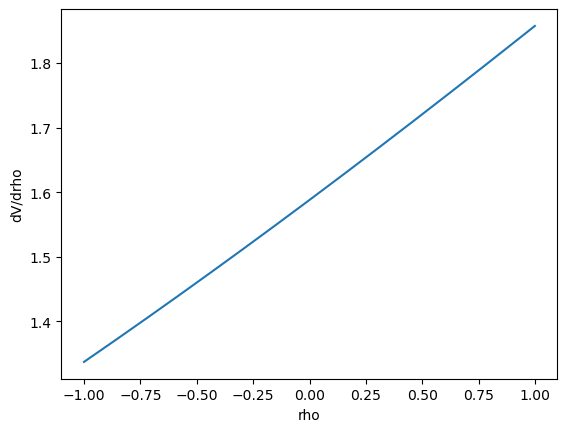

In [7]:
import matplotlib.pyplot as plt
import numpy as np


rho_range = np.arange(-1, 1, 0.001)
plt.plot(rho_range,
         [quantoCallRhoSlope(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F)
          for rho in rho_range])
plt.xlabel("rho")
plt.ylabel("dV/drho")

## Monte Carlo: Quanto European Call

Implement a Monte Carlo pricer to price the quanto call option in the stock's denominated currency

In [8]:
def montecarlo(simulate_path, f, num_path, steps, confidence=0.95):
    x = [f(simulate_path(steps)) for i in range(num_path)]

    mu = np.mean(x)
    se = np.std(x, ddof=1) / np.sqrt(num_path)

    lb, ub = norm.interval(confidence, mu, scale=se)
    return mu, lb, ub

In [9]:
def simulate(init: np.ndarray,
             mu: np.ndarray,
             sigma: np.ndarray,
             cov: np.ndarray,
             steps: np.ndarray) -> np.ndarray:
    dt = steps[1: ] - steps[: -1]
    num_steps = len(steps) - 1
    # CZ ~ N(0, CC^T) where Z ~ N(0, I)
    C = np.linalg.cholesky(cov)
    Z = np.random.standard_normal((num_steps, init.shape[0]))
    W = Z.dot(C.T)
    
    mf = np.exp(dt[:, np.newaxis] * (mu - 0.5 * (sigma ** 2)))
    noise = np.exp(np.sqrt(dt[:, np.newaxis]) * sigma * W)

    path = [init]
    for t in range(num_steps):
        path.append(path[t] * mf[t] * noise[t])

    return np.array(path)

In [10]:
def quantoEuropeanPayoff(sa, sb):
    return sb[-1] * max(sa[-1] - K, 0)


def quantoCallOptionMC(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F, nPath, steps, option_payoff=quantoEuropeanPayoff):
    cov = np.array([[1, rho], [rho, 1]])

    def simulate_path(steps):
        x = simulate(np.array([sa0, sb0]),
                     np.array([rd - ra, rd - rb]),
                     np.array([sigmaA, sigmaB]),
                     cov,
                     steps)
        return x[:, 0], x[:, 1]

    D = np.exp(-rb * T)
    def payoff(path):
        return D * F * option_payoff(*path)

    return montecarlo(simulate_path, payoff, nPath, steps)

The Monte Carlo price should simulate $S_a$ and $S_b$.
Compare the result with the closed form solution. Plot the convergence chart for different number of simulation paths.

In [11]:
def plot_convergence_with_npath(nStep=365, option_payoff=quantoEuropeanPayoff):
    rho = 0.4
    analytical_price = quantoCallAnalytic(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F)

    dt = T / nStep
    steps = np.arange(0, T + dt, dt)
    npath_range = range(100, 3000, 50)
    mu, lb, ub = zip(*[quantoCallOptionMC(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F, npath, steps, option_payoff) for npath in npath_range])
    
    plt.plot(npath_range, [analytical_price] * len(npath_range), label="Analytical", color='g')
    plt.plot(npath_range, mu, label="MC", color='b')
    plt.plot(npath_range, lb, label="MC LB-UB (95%)", color='r')
    plt.plot(npath_range, ub, color='r')
    
    plt.xlabel("npaths")
    plt.ylabel("price")
    plt.legend()
    plt.show()

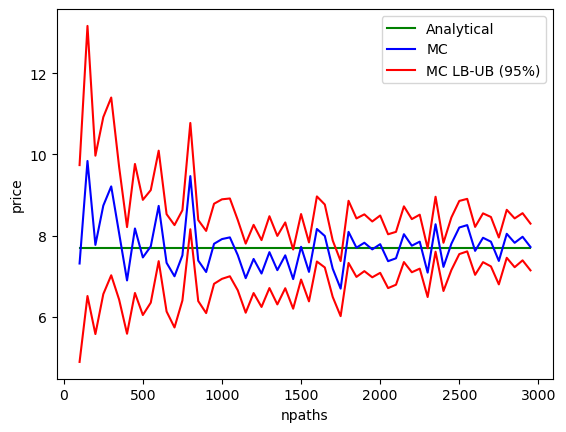

In [12]:
plot_convergence_with_npath(nStep=365)

Simulates with `nStep=365`. 95% confidence interval shrinks with increase in `nPaths`. MC has lots of variance but converges to the analytical solution as `nPaths` increase.

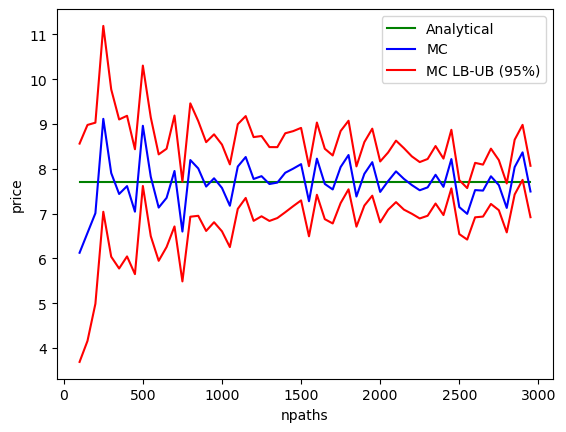

In [13]:
plot_convergence_with_npath(nStep=1)

## Monte Carlo: Arithmetic Quanto Asian Call

Implement a Monte-Carlo pricer that prices quanto arithmetic Asian call option.
A quanto arithmetic Asian call option pays the option holder $F_0 \times \max(A - K, 0)$ on the settlement date $t_s$ in the quanto currency, where

\begin{align}
A = \frac{1}{n}\sum_{i=1}^n S_a(t_i).
\end{align}

where $t_1 < t_2 < \ldots < t_n \leq t_s$. Equivalently, the payoff in the underlying's denominated currency is $F \times \max(A - K, 0) \times S_b(t_s)$, where $S_b$ is the value of one quanto currency in the unit of underlying's denominated currency.

Design the signature of the pricer, explain the main difference from the implementation in exercise 2.
Conduct test cases that demonstrate the correctness of the implementation (e.g., for degenerate case with only 1 fixing, the closed form solution exists and the price converges).

In [14]:
def quantoAsianPayoff(sa, sb):
    return sb[-1] * max(np.mean(sa) - K, 0)

Difference: change `sa[-1]` to `np.mean(sa)`. `nStep` matters here (through mean) unlike in the European option payoff. Additionally, it is possible that dt's are not the same. This is accounted for in the `simulate` function which takes the explicit `t_i`'s instead of `num_steps` or `dt`.

We can test with nStep = 2.

max(A = (Sa0 + Sa1)/2 - K, 0) = max(Sa1 - (2K - Sa0), 0)/2  
So, the Asian Option with nStep = 2 is half the European option with strike 2K - Sa0.

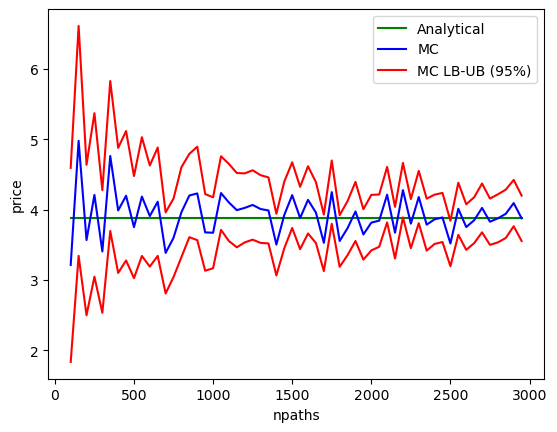

In [15]:
analytical_price = quantoCallAnalytic(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, 2*K - sa0, F) / 2

nstep = 1
steps = np.arange(0, T + 1, T)
npath_range = range(100, 3000, 50)
mu, lb, ub = zip(*[quantoCallOptionMC(rd, ra, rb, sigmaA, sigmaB, rho, sa0, sb0, T, K, F, npath, steps, option_payoff=quantoAsianPayoff) for npath in npath_range])

plt.plot(npath_range, [analytical_price] * len(npath_range), label="Analytical", color='g')
plt.plot(npath_range, mu, label="MC", color='b')
plt.plot(npath_range, lb, label="MC LB-UB (95%)", color='r')
plt.plot(npath_range, ub, color='r')

plt.xlabel("npaths")
plt.ylabel("price")
plt.legend()

Seems good enough.

## Monte Carlo: Shifted log-normal for European Option

On 21 Apr 2020, WTI Crude Oil May 2020 contract collapsed to negative for the first time.
This posed challenges to clearing houses\footnote{The Chicago Mercantile Exchange announced to switch to its pricing and margining options model from Black-Scholes to a normal vol Bachelier model if oil contract price is close to 0 (\url{https://www.cmegroup.com/content/dam/cmegroup/notices/clearing/2020/04/Chadv20-152.pdf}).} to calcualte settlement and margin for option contracts, and for financial institues to risk manage their positions.
One way to represent possible negative prices is to use a shifted log-normal model (not necessarily realisic and easy to risk manage):
\begin{align}
    \frac{dS_t}{(S_t+A)} = rdt + \sigma dW_t
\end{align}

where $A$ is a constant. In the context of crude oil futures, $A$ could represent the cost of delivery and storage (note also that commodity underlyings are normally not modelled as spot process, since Futures and Forwards are much more liquid than spot, here we are making simplifications again).

Implement a MC pricer to use the shifted log-normal model to price European payoffs.

### Euler-Maruyama discretization

State variable: $X_t = S_t + A$.

From [Ito's Lemma](https://en.wikipedia.org/wiki/It%C3%B4%27s_lemma), $dX_t = dS_t = rX_tdt + \sigma X_tdW_t$.

Using uniform time step $\Delta t = \frac{T}{m}$, the Euler-Maruyama schem is given by

\begin{align}
\hat{X}_0 &= X_0 \\
\hat{X}_{i+1} &= \hat{X}_{i}(1 + r\Delta t + \sigma\sqrt{\Delta t}Z_{i+1}) \\
\end{align}

In [16]:
def simulate_em(init, mu, sigma, dt, num_steps):
    path = [init]
    z = np.random.standard_normal(num_steps)
    for i in range(num_steps):
        path.append(path[i] * (1 + mu*dt + sigma*(dt**0.5)*z[i]))
    return path


def mcShiftedLogN(option, S, A, T, r, sigma, nPath, nStep=1):
    dt = T/nStep

    def simulate_path(num_steps):
        return simulate_em(S + A, r, sigma, dt, num_steps)

    def payoff(path):
        St = path[-1] - A
        return np.exp(-r * T) * option.payoff(St)

    return montecarlo(simulate_path, payoff, nPath, nStep)

In [17]:
from enum import Enum


PriceType = float


class OptionType(Enum):
    CALL = 1
    PUT = 2


class Option:
    def __init__(self,
                 option_type: OptionType,
                 K: PriceType):
        self.option_type = option_type
        self.K = K

    def is_call(self) -> bool:
        return self.option_type == OptionType.CALL

    def is_put(self) -> bool:
        return self.option_type == OptionType.PUT

    def simple_payoff(self, S: PriceType) -> PriceType:
        if self.is_call():
            return max(S - self.K, 0)
        if self.is_put():
            return max(self.K - S, 0)
        raise NotImplementedError()

    def payoff(self, S: PriceType, T: float = 0) -> PriceType:
        raise NotImplementedError()


class EuropeanOption(Option):
    def payoff(self, S: PriceType, T: float = 0) -> PriceType:
        return 0 if not is_close(T, 0) else super().simple_payoff(S)

Price an put option with $S_0 = -10, T=1, \sigma=150\%, r = 2\%, and\ K = 5$, for the shift A ranging from 15 to 100.

In [18]:
T=1
S0, K = -10, 5
r, sigma = 0.02, 1.5
option = EuropeanOption(OptionType.PUT, K)

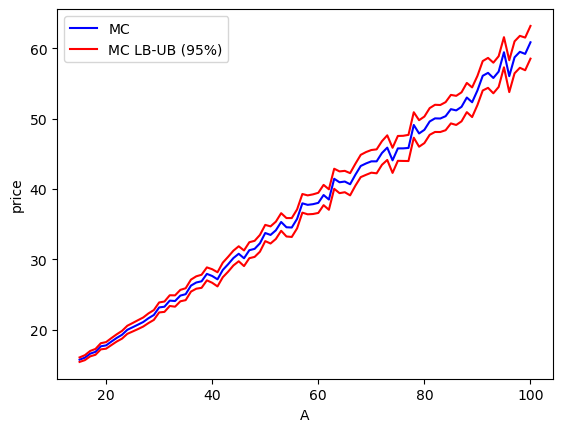

In [19]:
A_range = range(15, 101)

mu, lb, ub = zip(*[mcShiftedLogN(option, S0, A, T, r, sigma, nPath=1000, nStep=365) for A in A_range])

plt.plot(A_range, mu, color='b', label="MC")
plt.plot(A_range, lb, color='r', label="MC LB-UB (95%)")
plt.plot(A_range, ub, color='r')
plt.xlabel("A")
plt.ylabel("price")
plt.legend()

In [20]:
slope = np.mean(np.diff(mu))
slope

0.5302192574538042